In [1]:
import morphanalysis as sm

import skimage
import matplotlib.pyplot as plt

In [2]:
def plot(image):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image)
    ax.set_axis_off()
    plt.show()

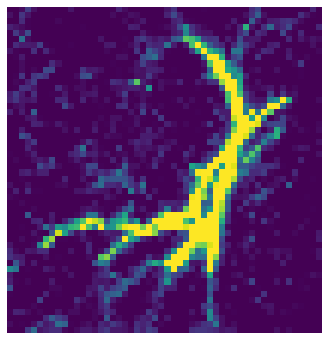

In [3]:
# path to a cell image (relative to Smorph folder)
cell_image = skimage.io.imread("Datasets/CTRLvsSTAB/control/MAX_SW MICE 3_SEC 1_GFAP_LEFT_CA1 _CONTRA_1-2_3.tif")
plot(cell_image)

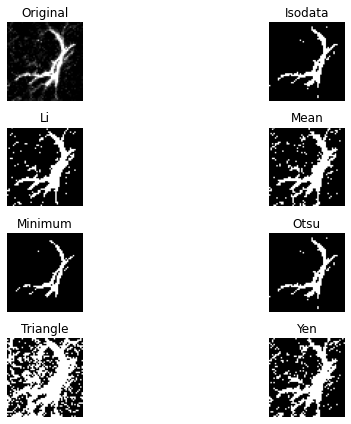

('isodata', 'li', 'mean', 'minimum', 'otsu', 'triangle', 'yen')

In [4]:
sm.try_all_threshold(cell_image)
sm.THRESHOLD_METHODS

In [5]:
contrast_ptiles = (2, 98)
threshold_method = sm.THRESHOLD_METHODS[4]

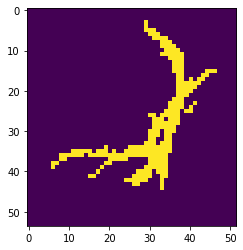

In [6]:
astrocyte = sm.Cell(cell_image, image_type='confocal',
                    contrast_ptiles=contrast_ptiles,
                    threshold_method=threshold_method)
plt.imshow(astrocyte.cleaned_image)

In [7]:
astrocyte.surface_area()

254

## Skeleton Analysis

In [8]:
skeleton = sm.Skeleton(cell_image, image_type='confocal',
                       contrast_ptiles=contrast_ptiles,
                       threshold_method=threshold_method)

In [9]:
# Sum of highlighted pixels is calculated to get the skeleton area estimate
skeleton.total_length()

96

In [10]:
# Sum of highlighted pixels is calculated to get the area estimate of astrocyte
skeleton.avg_process_thickness()

2.6

913

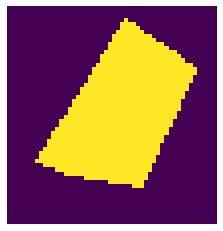

In [11]:
# Sum of pixels included in the smallest convex polygon that surround all astrocyte pixels
skeleton.convex_hull(plot=True)

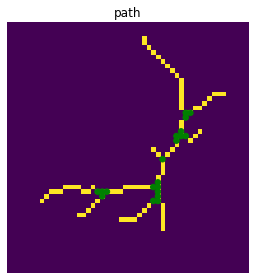

5

In [12]:
# Count all the bifurcation points
skeleton.get_no_of_forks(plot=True)

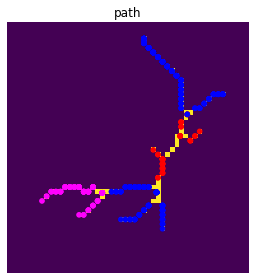

In [13]:
# The branches are differentiated into primary, secondary and
# further levels to compare any branch level differences between astrocytes
skeleton.classify_branching_structure(plot=True)

## Sholl Analysis

In [14]:
sholl = sm.Sholl(cell_image, image_type='confocal',
                 shell_step_size=3, polynomial_degree=3,
                 contrast_ptiles=contrast_ptiles,
                 threshold_method=threshold_method)

In [15]:
sm.best_poynomial_degree(sholl)

8

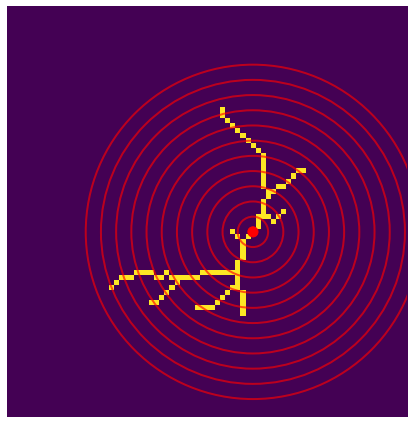

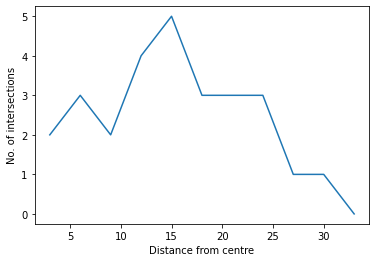

(array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33]),
 array([2, 3, 2, 4, 5, 3, 3, 3, 1, 1, 0], dtype=int64))

In [16]:
# Number of intersections of astrocytic branches at regular distances from the soma
sholl.sholl_results(plot=True)

Polynomial regression is used to mitigate the influence of local variations in the sampled data, and thereby better describe the relationship between intersections vs. distance

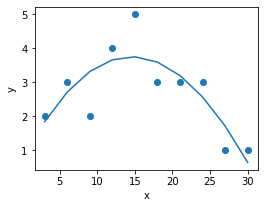

LinearRegression()

In [17]:
sholl.polynomial_fit(plot=True)

In [18]:
# Distance at which Critical value occurs (distance at which the Highest count of intersections occurred)
sholl.critical_radius()

15

In [19]:
# # Local maximum of the polynomial fit (Maximum no. of intersections)
sholl.critical_value()

3.75

In [20]:
# The last (thus, the widest) of intersecting radii to be associated with the number of intersections
sholl.enclosing_radius()

30

In [21]:
# Indication of how symmetrical the distribution is around its mean
sholl.skewness()

0.02

In [22]:
# Ratio between critical value and number of primary branches
sholl.schoenen_ramification_index()

0.94

In [23]:
# how close the data are to the fitted regression (indicative of the level of explained variability in the data set)
sholl.coefficient_of_determination()

0.88

In [24]:
# Rate of decay of no. of branches
sholl.sholl_regression_coefficient()

0.1

In [25]:
# Y intercept of the logarithmic plot
sholl.regression_intercept()

-1.86